# 2 - Introductory Example: Ground Irradiance Analysis for AgriPV

This journal supports the process of designing a solar panel configuration to appropriately represent and Agripv setup with varying parameters in bifacialvf.
The goal of this journal is to test and compare the irradiance values when changing certain parameters. Only one paramater is changed at a time. 
The results of this journal are used in the Radiance_Experiment_1 compare them to Radiance results, calculating accuracy as a percent difference.
(<a href="http://localhost:8888/notebooks/Documents/GitHub/bifacial_radiance/docs/tutorials/BifacialRadiance_Experiment_1.ipynb">BifacialRadiance_Experiment_1</a>)

Details:
*	Location: lat = 32.25, -110.9 (Tuscon, Arizona)
*	Racking: Fixed-tilt panels
*	Panel size: 1m x 2m                                    
*	Analysis variations:
<ul> <li> a.	Panel tilt: would like to examine angles 20,30 degrees. 
<li> b.	Clearance Height: would like to look at multiple heights ([0.25, 0.5, 0.75, 1, 1.5, 2 m) </li> 
<li> c.	Ground Coverage Ratio (GCR) (E/W): would like to look at multiple GCRs (0.28, 0.33, 0.4, 0.6) </li> 
<li> d. Ygaps: Looking at multiple Ygaps in the modules. (0, 0.1, 0.2, 0.3, 0.5, 1) </li>


In [1]:
from pathlib import Path
import os
import bifacialvf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# IO Files
testfolder = Path().resolve().parent.parent / 'bifacialvf' / 'TEMP' / 'Experiment_1'
if not os.path.exists(testfolder):
    os.makedirs(testfolder)

In [2]:
# Variables

months = ['May','Jun','Jul','Aug','Sep','Oct']
lat = 32.25
lon = -110.9  #Lat and Long for Tuscon Arizona           
sazm = 180                  
albedo = 0.31  
x = 1
y = 2 
rowType = "interior"        # RowType(first interior last single)
transFactor = 0             # TransmissionFactor(open area fraction)
sensorsy = 12   # sensorsy(# hor rows in panel)   <--> THIS ASSUMES LANDSCAPE ORIENTATION 
PVfrontSurface = "glass"    # PVfrontSurface(glass or ARglass)
PVbackSurface = "glass"     # PVbackSurface(glass or ARglass)
agriPV = True
numpanels = 1
CW = y * numpanels

#Arrays for loops
tilts = [20,30]  
clearance_heights = np.array([0.25,0.5,0.75,1,1.5,2]) 
GCRs = [0.28,0.33,0.4,0.6]

#Defaults
tilt_def = tilts[0]
clearance_height_def = clearance_heights[2]
GCR_def = GCRs[1]
pitch_def = CW/GCR_def/CW
module_place = CW/GCR_def
 
# Tracking instructions
tracking=False
backtrack=False
limit_angle = 65





In [3]:
#Get weather file for Tuscon AZ
TMYtoread=bifacialvf.getEPW(lat=lat,lon=lon, path = testfolder)
myTMY3, meta = bifacialvf.readInputTMY(TMYtoread)
deltastyle = 'TMY3'

path = C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1
Getting weather file: USA_AZ_Davis-Monthan.AFB.722745_TMY3.epw
 ... OK!


## Experiment for tilt

In [4]:
for ti in range (0, len(tilts)):
    #Build scene and run bifacialvf for all tilts
    tilt = tilts[ti]
    writefiletitle = os.path.join(testfolder, 'Results_Test_Tilt_'+str(tilt)+'.csv')
    bifacialvf.simulate(myTMY3, meta, writefiletitle=writefiletitle, 
                        tilt=tilt, sazm=sazm, pitch=pitch_def, clearance_height=clearance_height_def, 
                        rowType=rowType, transFactor=transFactor, sensorsy=sensorsy, 
                        PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, 
                        albedo=albedo, tracking=tracking, backtrack=backtrack, 
                        limit_angle=limit_angle, deltastyle=deltastyle, agriPV=True)


Calculating Sun position with a delta of -30 mins. i.e. 12 is 11:30 sunpos
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.75   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_Tilt_20.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  2.090610409517122
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:58<00:00, 73.75it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  30   Sazm:  180     Clearance_Height :  0.75   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_Tilt_30.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  1.0887198050270444
Actual distance between rows =  2.1642776265185915
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [02:06<00:00, 69.02it/s]

Finished


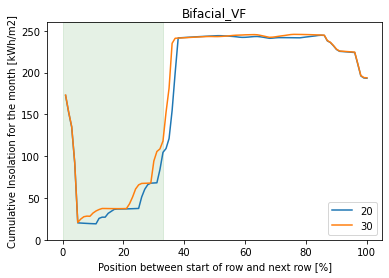

In [5]:
# Graph Tilts
for ti in range (0, len(tilts)):
    tilt = tilts[ti]
    writefiletitle = os.path.join(testfolder, 'Results_Test_Tilt_'+str(tilt)+'.csv')
    #Load the results from the resultfile
    from bifacialvf import loadVFresults
    (data, metadata) = loadVFresults(writefiletitle)
    #Work with data in resultfile
    data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
    data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
    groundIrrads = data['Ground Irradiance Values'].str.strip('[]').str.split(' ', expand=True).astype(float)
    df = groundIrrads.groupby([pd.Grouper(freq='M')]).sum().T
    df.rename(columns={ df.columns[0]: "Jan", df.columns[1]: "Feb",df.columns[2]: "Mar", df.columns[3]: "Apr",

                       df.columns[4]: "May",df.columns[5]: "Jun",df.columns[6]: "Jul",df.columns[7]: "Aug",
                       df.columns[8]: "Sep",df.columns[9]: "Oct",df.columns[10]: "Nov",df.columns[11]: "Dec"    }, inplace = True)
    x_axis = list(range(1,101))
    plt.figure(1)
    VF = plt.plot(x_axis, df['Jun']/1000, label=tilt)
    module_end = (2/module_place)*100 #Percentage between rows where the module ends)
    plt.axvspan(0, module_end, alpha=.05, color='green')
    plt.title('Bifacial_VF')
    plt.ylim([0, 260])
    plt.xlabel('Position between start of row and next row [%]')
    plt.ylabel('Cumulative Insolation for the month [kWh/m2]')
    plt.legend()

## Experiment for Clearance height

In [6]:
for ch in range (0, len(clearance_heights)):
    chreg = clearance_heights[ch]
    clearance_height = chreg/CW #Normalize using the collector width. Needed for bifacial VF
    writefiletitle = os.path.join(testfolder, 'Results_Test_ClearanceHeight_'+str(chreg)+'.csv')
    bifacialvf.simulate(myTMY3, meta, writefiletitle=writefiletitle, 
                        tilt=tilt_def, sazm=sazm, pitch=pitch_def, clearance_height=clearance_height, 
                        rowType=rowType, transFactor=transFactor, sensorsy=sensorsy, 
                        PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, 
                        albedo=albedo, tracking=tracking, backtrack=backtrack, 
                        limit_angle=limit_angle, deltastyle=deltastyle, agriPV=True)


Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.125   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_ClearanceHeight_0.25.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  2.090610409517122
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:32<00:00, 94.63it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.25   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_ClearanceHeight_0.5.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  2.090610409517122
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:35<00:00, 91.31it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.375   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_ClearanceHeight_0.75.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  2.090610409517122
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:37<00:00, 89.65it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.5   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_ClearanceHeight_1.0.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  2.090610409517122
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:45<00:00, 83.00it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.75   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_ClearanceHeight_1.5.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  2.090610409517122
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:49<00:00, 80.36it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  1.0   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_ClearanceHeight_2.0.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  2.090610409517122
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:47<00:00, 81.37it/s]

Finished


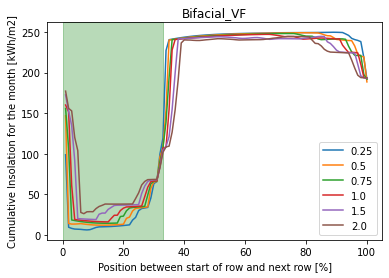

In [8]:
for ch in range (0, len(clearance_heights)):
    #Graph results for all clearance heights
    chreg = clearance_heights[ch]
    clearance_height = chreg/CW #Normalize using the collector width. Needed for bifacial VF
    writefiletitle = os.path.join(testfolder, 'Results_Test_ClearanceHeight_'+str(chreg)+'.csv')
    #Load the results from the resultfile
    from bifacialvf import loadVFresults
    (data, metadata) = loadVFresults(writefiletitle)
    #Work with data in resultfile
    data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
    data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
    groundIrrads = data['Ground Irradiance Values'].str.strip('[]').str.split(' ', expand=True).astype(float)
    df = groundIrrads.groupby([pd.Grouper(freq='M')]).sum().T
    df.rename(columns={ df.columns[0]: "Jan", df.columns[1]: "Feb",df.columns[2]: "Mar", df.columns[3]: "Apr",

                       df.columns[4]: "May",df.columns[5]: "Jun",df.columns[6]: "Jul",df.columns[7]: "Aug",
                       df.columns[8]: "Sep",df.columns[9]: "Oct",df.columns[10]: "Nov",df.columns[11]: "Dec"    }, inplace = True)
    x_axis = list(range(1,101))
    plt.figure(1)
    VF = plt.plot(x_axis, df['Jun']/1000, label=chreg)
    module_end = (2/module_place)*100 #Percentage between rows where the module ends)
    plt.axvspan(0, module_end, alpha=.05, color='green')
    plt.title('Bifacial_VF')
    plt.xlabel('Position between start of row and next row [%]')
    plt.ylabel('Cumulative Insolation for the month [kWh/m2]')
    plt.legend()

## Experiment for GCR

In [9]:
for gc in range (0, len(GCRs)):
    GCR = GCRs[gc]
    pitch = CW/GCR
    writefiletitle = os.path.join(testfolder, 'Results_Test_GCR_'+str(GCR)+'.csv')
    bifacialvf.simulate(myTMY3, meta, writefiletitle=writefiletitle, 
                        tilt=tilt_def, sazm=sazm, pitch=pitch, clearance_height=clearance_height_def, 
                        rowType=rowType, transFactor=transFactor, sensorsy=sensorsy, 
                        PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, 
                        albedo=albedo, tracking=tracking, backtrack=backtrack, 
                        limit_angle=limit_angle, deltastyle=deltastyle, agriPV=True)

  

Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.75   Pitch:  7.142857142857142   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_GCR_0.28.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  6.2031645220712335
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:37<00:00, 89.76it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.75   Pitch:  6.0606060606060606   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_GCR_0.33.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  5.120913439820152
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:37<00:00, 90.21it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.75   Pitch:  5.0   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_GCR_0.4.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  4.060307379214091
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:39<00:00, 88.17it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.75   Pitch:  3.3333333333333335   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_GCR_0.6.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  2.393640712547425
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:46<00:00, 82.36it/s]

Finished


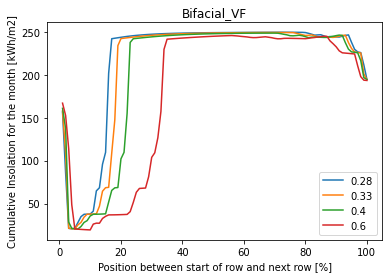

In [10]:
for gc in range (0, len(GCRs)):
    GCR = GCRs[gc]
    pitch = CW/GCR
    writefiletitle = os.path.join(testfolder, 'Results_Test_GCR_'+str(GCR)+'.csv')
    #Load the results from the resultfile
    from bifacialvf import loadVFresults
    (data, metadata) = loadVFresults(writefiletitle)
    #Work with data in resultfile
    data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
    data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
    groundIrrads = data['Ground Irradiance Values'].str.strip('[]').str.split(' ', expand=True).astype(float)
    df = groundIrrads.groupby([pd.Grouper(freq='M')]).sum().T
    # I'm sure there's a fancier way to do this but hey, this works.
    df.rename(columns={ df.columns[0]: "Jan", df.columns[1]: "Feb",df.columns[2]: "Mar", df.columns[3]: "Apr",

                       df.columns[4]: "May",df.columns[5]: "Jun",df.columns[6]: "Jul",df.columns[7]: "Aug",
                       df.columns[8]: "Sep",df.columns[9]: "Oct",df.columns[10]: "Nov",df.columns[11]: "Dec"    }, inplace = True)
    x_axis = list(range(1,101))
    plt.figure(1)
    VF = plt.plot(x_axis, df['Jun']/1000, label=GCR)
    plt.title('Bifacial_VF')
    plt.xlabel('Position between start of row and next row [%]')
    plt.ylabel('Cumulative Insolation for the month [kWh/m2]')
    plt.legend()

## Compare VF and Radiance

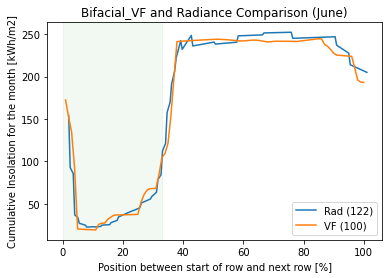

In [11]:
from bifacialvf import loadVFresults
VFfile = r'C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_Tilt_20.csv'
(data, metadata) = loadVFresults(VFfile)
#Work with data in resultfile
data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
groundIrrads = data['Ground Irradiance Values'].str.strip('[]').str.split(' ', expand=True).astype(float)
df = groundIrrads.groupby([pd.Grouper(freq='M')]).sum().T
# I'm sure there's a fancier way to do this but hey, this works.
df.rename(columns={ df.columns[0]: "Jan", df.columns[1]: "Feb",df.columns[2]: "Mar", df.columns[3]: "Apr",

                   df.columns[4]: "May",df.columns[5]: "Jun",df.columns[6]: "Jul",df.columns[7]: "Aug",
                   df.columns[8]: "Sep",df.columns[9]: "Oct",df.columns[10]: "Nov",df.columns[11]: "Dec"    }, inplace = True)
x_axis = list(range(1,101))
Radiance_File = r'C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_1\results\irr_Rad_Experiment1_tilt_20_Ground_Analysis_Front.csv'
(dataR, metadata) = loadVFresults(Radiance_File)
data_lineR = dataR
data_line_fR = data_lineR[::-1].reset_index(drop = True)
data_line_fR.rename(columns={ data_line_fR.columns[0]: "x", data_line_fR.columns[1]: "y",data_line_fR.columns[2]: "z", data_line_fR.columns[3]: "mattype",data_line_fR.columns[4]: "Wm2Front",}, inplace = True)
yshift = data_line_fR['y'] + 1
ystep = (yshift/6.06)*100
#Plot Radiance and VF lines
plt.figure(1)
Rad = plt.plot(ystep, data_line_fR['Wm2Front']/1000, label='Rad (122)')
VF = plt.plot(x_axis, df['Jun']/1000, label='VF (100)')
module_end = (2/module_place)*100 #Percentage between rows where the module ends)
plt.axvspan(0, module_end, alpha=.05, color='green')
plt.title('Bifacial_VF and Radiance Comparison (June)')
plt.xlabel('Position between start of row and next row [%]')
plt.ylabel('Cumulative Insolation for the month [kWh/m2]')
plt.legend()

## Changing Transmission Factor

In [12]:
xl = 2
yl = 1 
ygaps = [0,.1,.2,.3,.5,1]
numpanels_l = 2


for yg in range (0, len(ygaps)):
        #Build scene and run raytracing for all 3 azimuths
    ygap = ygaps[yg]
    CW = yl * numpanels_l +(ygap * (numpanels_l-1)) #Collector Width
    AA = yl*numpanels_l #Area of module that light hits
    transFactor = 1 - (AA/CW) # TransmissionFactor(open area fraction)
    pitch = CW/GCR_def/CW
    print(CW,AA,transFactor)
    writefiletitle = os.path.join(testfolder, 'Results_Test_TFactor_'+str(transFactor)+'.csv')
    bifacialvf.simulate(myTMY3, meta, writefiletitle=writefiletitle, 
                        tilt=tilt_def, sazm=sazm, pitch=pitch, clearance_height=clearance_height_def, 
                        rowType=rowType, transFactor=transFactor, sensorsy=sensorsy, 
                        PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, 
                        albedo=albedo, tracking=tracking, backtrack=backtrack, 
                        limit_angle=limit_angle, deltastyle=deltastyle, agriPV=True)

2 2 0.0
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.75   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_TFactor_0.0.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  2.090610409517122
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:51<00:00, 78.23it/s]


Finished
2.1 2 0.04761904761904767
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.75   Pitch:  3.03030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_TFactor_0.04761904761904767.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  2.0906104095171214
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:44<00:00, 83.53it/s]


Finished
2.2 2 0.09090909090909094
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.75   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_TFactor_0.09090909090909094.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  2.090610409517122
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:47<00:00, 81.46it/s]


Finished
2.3 2 0.13043478260869557
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.75   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_TFactor_0.13043478260869557.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  2.090610409517122
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:53<00:00, 77.12it/s]


Finished
2.5 2 0.19999999999999996
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.75   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_TFactor_0.19999999999999996.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  2.090610409517122
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:58<00:00, 73.71it/s]


Finished
3 2 0.33333333333333337
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.75   Pitch:  3.03030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_TFactor_0.33333333333333337.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  2.0906104095171214
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:54<00:00, 76.19it/s]

Finished


2 2 0.0
2.1 2 0.04761904761904767
2.2 2 0.09090909090909094
2.3 2 0.13043478260869557
2.5 2 0.19999999999999996
3 2 0.33333333333333337


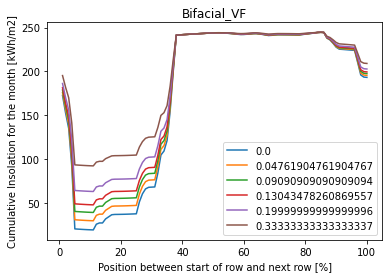

In [13]:
xl = 2
yl = 1 
ygaps = [0,.1,.2,.3,.5,1]
numpanels_l = 2


for yg in range (0, len(ygaps)):
    ygap = ygaps[yg]
    CW = yl * numpanels_l +(ygap * (numpanels_l-1)) #Collector Width
    AA = yl*numpanels_l #Area of module that light hits
    transFactor = 1 - (AA/CW) # TransmissionFactor(open area fraction)
    pitch = CW/GCR_def/CW
    print(CW,AA,transFactor)
    writefiletitle = os.path.join(testfolder, 'Results_Test_TFactor_'+str(transFactor)+'.csv')

    #Load the results from the resultfile
    from bifacialvf import loadVFresults
    (data, metadata) = loadVFresults(writefiletitle)
    #Work with data in resultfile
    data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
    data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
    groundIrrads = data['Ground Irradiance Values'].str.strip('[]').str.split(' ', expand=True).astype(float)
    df = groundIrrads.groupby([pd.Grouper(freq='M')]).sum().T
    # I'm sure there's a fancier way to do this but hey, this works.
    df.rename(columns={ df.columns[0]: "Jan", df.columns[1]: "Feb",df.columns[2]: "Mar", df.columns[3]: "Apr",

                       df.columns[4]: "May",df.columns[5]: "Jun",df.columns[6]: "Jul",df.columns[7]: "Aug",
                       df.columns[8]: "Sep",df.columns[9]: "Oct",df.columns[10]: "Nov",df.columns[11]: "Dec"    }, inplace = True)
    x_axis = list(range(1,101))
    plt.figure(1)
    VF = plt.plot(x_axis, df['Jun']/1000, label=transFactor)
    plt.title('Bifacial_VF')
    plt.xlabel('Position between start of row and next row [%]')
    plt.ylabel('Cumulative Insolation for the month [kWh/m2]')
    plt.legend()